## 구글 드라이브 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/산대특/data/'

- 데이터 불러오기 

In [4]:
google  = pd.read_csv(DATA_PATH + 'google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


## 날짜 데이터 타입 배우기
- 참조 : https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html 
  + 미래에 내가 볼 지 말지, 모르겠다! 

In [8]:
import pandas as pd 
from datetime import datetime 
time_stamp = pd.Timestamp(datetime(2023, 3, 20))

print(type(time_stamp))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
pd.Timestamp('2023-03-20')

Timestamp('2023-03-20 00:00:00')

- 몇가지 옵션 확인

In [10]:
# 연도추출 
time_stamp.year

2023

In [12]:
time_stamp.month

3

In [14]:
time_stamp.day

20

In [15]:
time_stamp.dayofweek

0

In [16]:
# 요일 구하세요
time_stamp.day_name()

'Monday'

## pd.Period
- https://pandas.pydata.org/docs/reference/api/pandas.Period.html
  + 미래의 내가 볼지 안 볼지 모르겠다. 

In [20]:
tmp_period = pd.Period('2023-02')
tmp_period

Period('2023-02', 'M')

In [22]:
# 캘린더 데이
# 비즈니스 데이
tmp_period.asfreq('D')

Period('2023-02-28', 'D')

In [23]:
tmp_period.to_timestamp().to_period('M')

Period('2023-02', 'M')

## 임의의 시계열 데이터 생성

In [26]:
index = pd.date_range(start='2023-01-01', periods = 12, freq='M')
index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [29]:
# 데이터프레임으로 변환
result = pd.DataFrame({'date' : index})
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


- 시계열 데이터 생성

In [30]:
import numpy as np 
data = np.random.random(size=(12, 2))
data

array([[0.98578377, 0.16816398],
       [0.54550815, 0.69975034],
       [0.30236339, 0.20214568],
       [0.23559862, 0.70755981],
       [0.04120855, 0.82228524],
       [0.5667591 , 0.07333945],
       [0.41095162, 0.34932132],
       [0.75750273, 0.28337618],
       [0.31534629, 0.37949791],
       [0.65632687, 0.60992003],
       [0.56274078, 0.25466875],
       [0.15619487, 0.10038937]])

In [31]:
# 데이터프레임으로 변환
result = pd.DataFrame(data = data, index=index)
result.head()

,0,1
2023-01-31,0.985784,0.168164
2023-02-28,0.545508,0.699750
2023-03-31,0.302363,0.202146
2023-04-30,0.235599,0.707560
2023-05-31,0.041209,0.822285


In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2023-01-31 to 2023-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [42]:
# 반복문 문제 

day_7 = pd.date_range('2023-3-20', periods = 7)
day_7

# 반복문을 활용해서 dayofweek, day_name()을 활용해서 
# 리스트로 변환 할 필요 없음
# 예시 출력 
# 0 Monday
# 1 Tuesday

for day in day_7:
  print(day.year, day.dayofweek, day.day_name(), day.month)

2023 0 Monday 3
2023 1 Tuesday 3
2023 2 Wednesday 3
2023 3 Thursday 3
2023 4 Friday 3
2023 5 Saturday 3
2023 6 Sunday 3


In [43]:
google = pd.read_csv(DATA_PATH + 'google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


- 날짜 데이터 객체로 변환하면, year, month 등등 편안하게 사용 가능함
- object를 날짜 데이터 객체로 변환

In [44]:
google['Date'] = pd.to_datetime(google['Date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [45]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [46]:
google2 = google.copy()
google2 = google.set_index('Date')
google2.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [47]:
google2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: title={'center': 'Stock Price'}, xlabel='Date'>

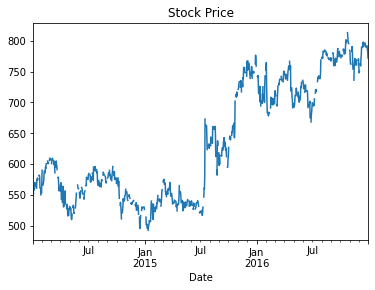

In [48]:
google2['Close'].plot(title = 'Stock Price')

## Indexsing

In [49]:
google2.loc['2015'].head()

,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87


In [50]:
# 2015-3 ~ 2015-8
google2.loc['2015-3':'2015-8'].head()

,Close
Date,
2015-03-01,NaN
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33


- 특정한 날짜의 종가 구하기

In [54]:
google2.loc['2016-6-2', 'Close']

730.4

In [56]:
# 캘린더 데이, 비즈니스 데이 
google2.asfreq('D').head() # 캘린더 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [57]:
google2.asfreq('B').head() # 캘린더 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [58]:
yahoo = pd.read_csv(DATA_PATH + 'yahoo.csv')
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo = yahoo.set_index('date')
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [59]:
yahoo.tail()

,price
date,
2015-12-25,NaN
2015-12-28,33.60
2015-12-29,34.04
2015-12-30,33.37
2015-12-31,33.26


In [64]:
result1 = yahoo.loc['2013', ['price']].reset_index(drop=True)
result1 = result1.rename(columns = {'price' : '2013'})

result2 = yahoo.loc['2014', ['price']].reset_index(drop=True)
result2 = result2.rename(columns = {'price' : '2014'})

result3 = yahoo.loc['2015', ['price']].reset_index(drop=True)
result3 = result3.rename(columns = {'price' : '2015'})

final_result = pd.concat([result1, result2, result3], axis = 1)
final_result

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


In [72]:
years = list(range(1900, 2021))
print(years)

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [74]:
# 빈 데이터프레임 객체
datas = pd.DataFrame()

years = list(range(2013, 2016))
for year in years: 
  year = str(year)
  result1 = yahoo.loc[year, ['price']].reset_index(drop=True)
  result1 = result1.rename(columns = {'price' : year})

  # 저장한 후 업데이트
  datas = pd.concat([datas, result1], axis = 1)

datas

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


## Matplotlib 설치
- 버전업을 해주세요

In [1]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 런타임 재시작

In [1]:
import matplotlib as mpl
print(mpl.__version__)

3.7.1


In [2]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

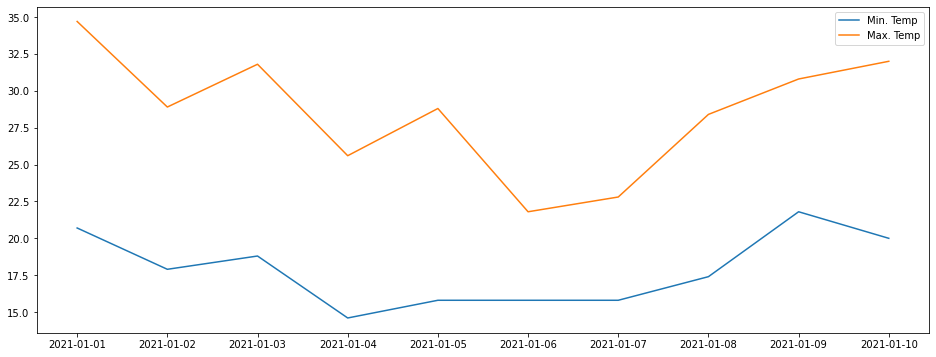

In [7]:
# 여기부터 시작
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(16, 6))

# 내부 시각화 코드 디테일하게 작성
ax.plot(dates, min_temperature, label = 'Min. Temp') # 라인 그래프
ax.plot(dates, max_temperature, label = 'Max. Temp') # 라인 그래프
ax.legend() # 범례
plt.show()

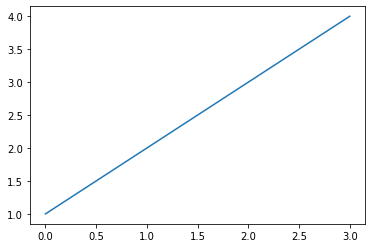

In [8]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()

## 주가 데이터 불러오기

In [9]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 166.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.3 MB/s eta 0:00:00


In [26]:
import yfinance as yf

data = yf.download("TSLA", start="2021-10-01", end="2023-03-17")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400


In [27]:
aapl_close = data['Close']
aapl_close.head()

Date
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
2021-10-06    260.916656
2021-10-07    264.536682
Name: Close, dtype: float64

In [31]:
apple = yf.download("AAPL", start="2021-10-01", end="2023-03-17")
apple2 = apple['Close']
apple2.head()

[*********************100%***********************]  1 of 1 completed


Date
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    141.110001
2021-10-06    142.000000
2021-10-07    143.289993
Name: Close, dtype: float64

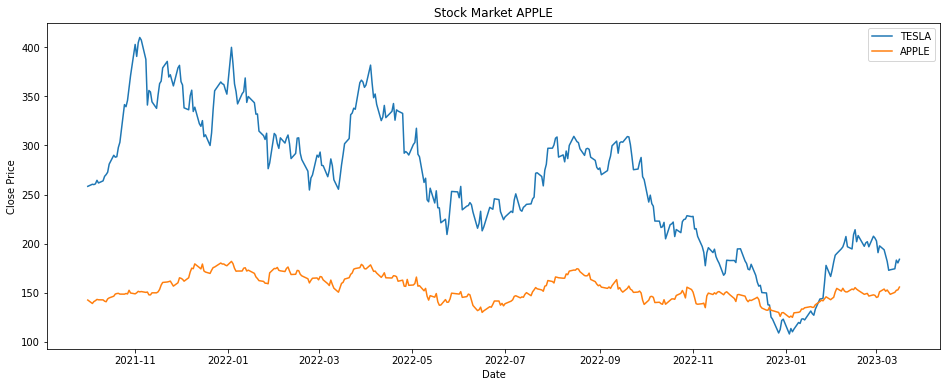

In [32]:
# 라인 그래프 작성 시작
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(aapl_close, label='TESLA')
ax.plot(apple2, label='APPLE')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Stock Market APPLE')
plt.show()

## 막대그래프
- 참조 : https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

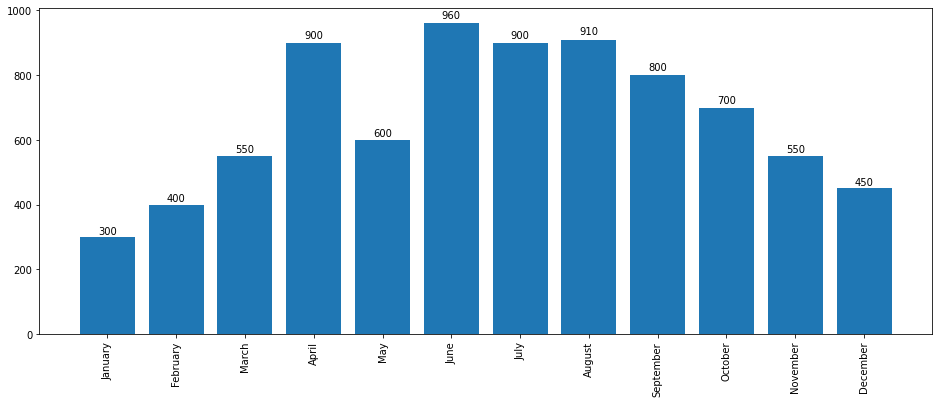

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

# 막대 그래프
fig, ax = plt.subplots(figsize=(16, 6))
barplots = ax.bar(month_list, sold_list)
for rect in barplots:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, 1.01 * height, height, ha = 'center', va = 'bottom')

plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plt.show()

## 히스토그램 & 수직 그래프

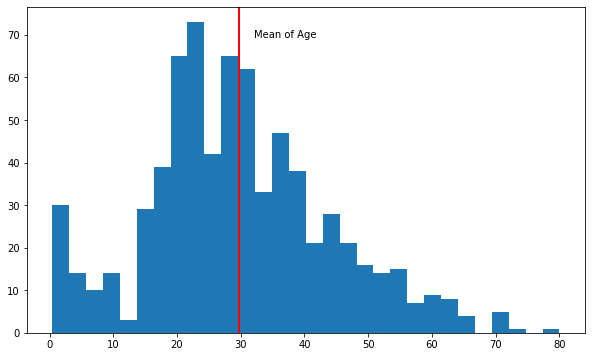

In [60]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

# 데이터 불러오기
titanic = sns.load_dataset('titanic')

# 데이터 가공
age = titanic['age']  

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 6))

## 메인 시각화 작성
ax.hist(age, bins = 30)

## 세부 그래프를 추가
ax.axvline(x = age.mean(), linewidth = 2, color = 'r')
ax.text(37, 70, 'Mean of Age', horizontalalignment='center', verticalalignment='center')

plt.show()